In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

from IPython.display import Markdown, display
%matplotlib inline

### Load a file from the 201905 hindcast

In [2]:
f=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201405_201405_ptrc_T.nc')

In [3]:
f1=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201505_201505_ptrc_T.nc')

In [4]:
f2=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201605_201605_ptrc_T.nc')

In [5]:
f3=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201705_201705_ptrc_T.nc')

In [6]:
f4=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201805_201805_ptrc_T.nc')

In [7]:
f5=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201905_201905_ptrc_T.nc')

In [8]:
print(f.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [9]:
fe3t=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201405_201405_carp_T.nc')

In [10]:
fe3t1=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201505_201505_carp_T.nc')

In [11]:
fe3t2=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201605_201605_carp_T.nc')

In [12]:
fe3t3=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201705_201705_carp_T.nc')

In [13]:
fe3t4=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201805_201805_carp_T.nc')

In [14]:
fe3t5=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201905_201905_carp_T.nc')

In [15]:
# return times as datetime objects:
torig=dt.datetime.strptime(f.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f.variables['time_centered'][:]])

1900-01-01 00:00:00


In [16]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


### Surface plots - Aerial view

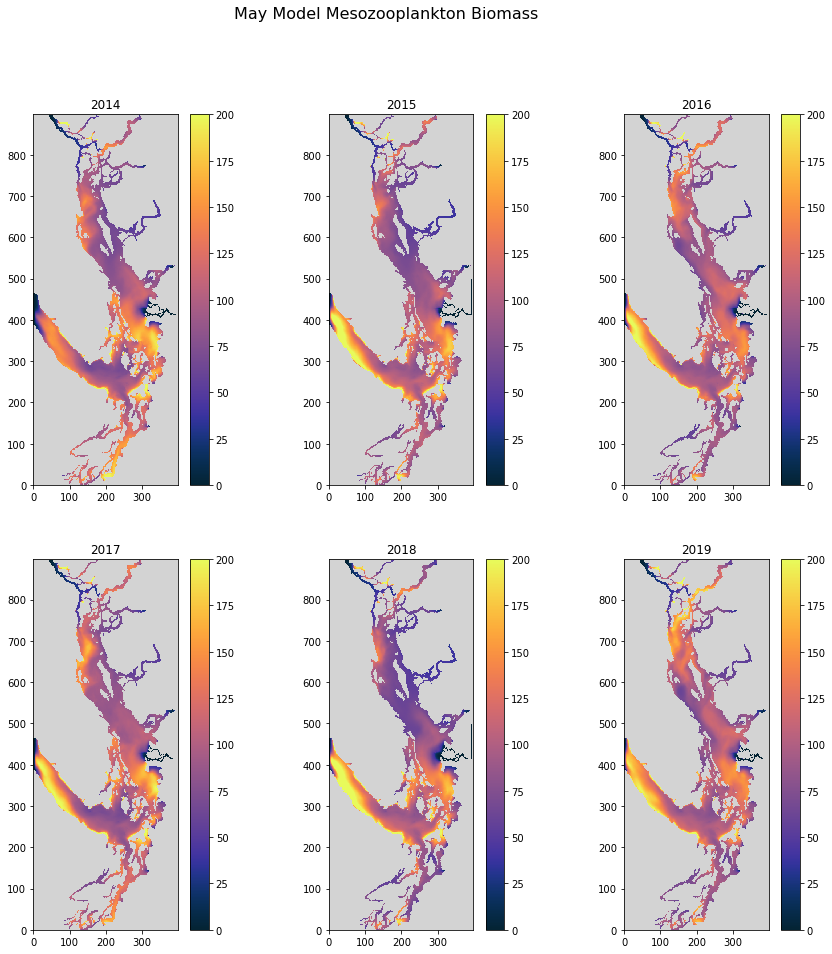

In [21]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('lightgrey')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(2,3,figsize=(15,15))
fig.suptitle('May Model Mesozooplankton Biomass', fontsize=16)
m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f.variables['mesozooplankton'][il,0,:,:])*5.7*12,cmap=cmap0,vmin=0,vmax=200)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2014')
fig.colorbar(m0,ax=ax[0,0])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f1.variables['mesozooplankton'][il,0,:,:])*5.7*12,cmap=cmap0,vmin=0,vmax=200)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2015')
fig.colorbar(m0,ax=ax[0,1])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f2.variables['mesozooplankton'][il,0,:,:])*5.7*12,cmap=cmap0,vmin=0,vmax=200)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2016')
fig.colorbar(m0,ax=ax[0,2])

m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f3.variables['mesozooplankton'][il,0,:,:])*5.7*12,cmap=cmap0,vmin=0,vmax=200)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2017')
fig.colorbar(m0,ax=ax[1,0])

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f4.variables['mesozooplankton'][il,0,:,:])*5.7*12,cmap=cmap0,vmin=0,vmax=200)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2018')
fig.colorbar(m0,ax=ax[1,1])

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,f5.variables['mesozooplankton'][il,0,:,:])*5.7*12,cmap=cmap0,vmin=0,vmax=200)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2019')
fig.colorbar(m0,ax=ax[1,2])

## Depth-Averaged Plots

/home/ksuchy/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)
<ipython-input-22-4842a65f37df>:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[0,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=8,shading='nearest')
<ipython-input-22-4842a65f37df>:20: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[0,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz1*5.7*12/1000)),cmap=cmap0,vmin

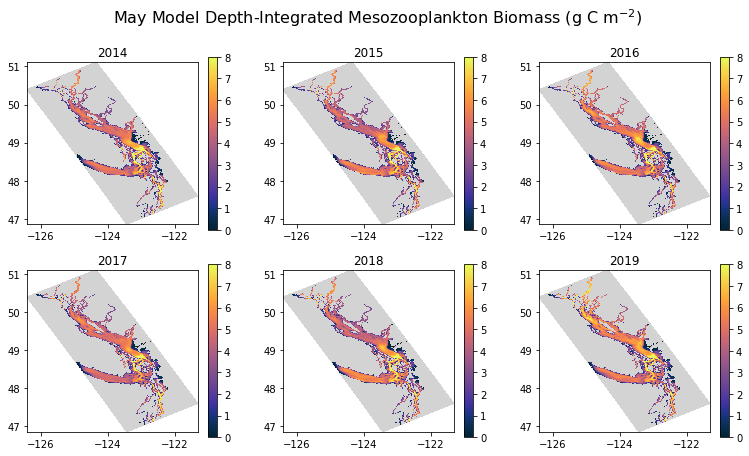

In [22]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('lightgrey')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(2,3,figsize=(13,7))
fig.suptitle('May Model Depth-Integrated Mesozooplankton Biomass (g C m$^{-2}$)', fontsize=16)

intuz=np.sum(f.variables['mesozooplankton'][il,:,:,:]*fe3t.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz=intuz/np.sum(fe3t.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=8,shading='nearest')
viz_tools.set_aspect(ax[0,0],coords='map')
ax[0,0].set_title('2014');
fig.colorbar(m1,ax=ax[0,0])

intuz1=np.sum(f1.variables['mesozooplankton'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz1=intuz1/np.sum(fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz1*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=8,shading='nearest')
viz_tools.set_aspect(ax[0,1],coords='map')
ax[0,1].set_title('2015');
fig.colorbar(m1,ax=ax[0,1])

intuz2=np.sum(f2.variables['mesozooplankton'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz2=intuz2/np.sum(fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz2*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=8,shading='nearest')
viz_tools.set_aspect(ax[0,2],coords='map')
ax[0,2].set_title('2016');
fig.colorbar(m1,ax=ax[0,2])

intuz3=np.sum(f3.variables['mesozooplankton'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz3*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=8,shading='nearest')
viz_tools.set_aspect(ax[1,0],coords='map')
ax[1,0].set_title('2017');
fig.colorbar(m1,ax=ax[1,0])

intuz4=np.sum(f4.variables['mesozooplankton'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz4*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=8,shading='nearest')
viz_tools.set_aspect(ax[1,1],coords='map')
ax[1,1].set_title('2018');
fig.colorbar(m1,ax=ax[1,1])

intuz5=np.sum(f5.variables['mesozooplankton'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz5*5.7*12/1000)),cmap=cmap0,vmin=0,vmax=8,shading='nearest')
viz_tools.set_aspect(ax[1,2],coords='map')
ax[1,2].set_title('2019');
fig.colorbar(m1,ax=ax[1,2])

In [19]:
f.close()
fe3t.close()

In [20]:
f1.close()
fe3t1.close()

In [21]:
f2.close()
fe3t2.close()

In [22]:
f3.close()
fe3t3.close()

In [23]:
f4.close()
fe3t4.close()

In [24]:
f5.close()
